## install & import necessary libreries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
# Load the dataset
df=pd.read_csv("co2_greenHouseGas_Emissions.csv")
print(df)

             Region CO2 Emissions (Mt) Greenhouse Gas Emissions (Mt)  \
0       Afghanistan               5.68                         98.9    
1           Albania               4.49                         10.1    
2           Algeria             177.08                        218.9    
3            Angola              20.19                         79.7    
4          Anguilla               0.02                           NaN   
..              ...                ...                           ...   
199         Vietnam             327.91                        376.5    
200  Western Sahara               0.24                           NaN   
201           Yemen              12.26                         21.8    
202          Zambia               9.27                         40.7    
203        Zimbabwe              10.22                         31.4    

         Continent  
0             Asia  
1           Europe  
2           Africa  
3           Africa  
4    North America  
..       

In [14]:
# Inspect first few rows
df.head()

,Region,CO2 Emissions (Mt),Greenhouse Gas Emissions (Mt),Continent
0,Afghanistan,5.68,98.9,Asia
1,Albania,4.49,10.1,Europe
2,Algeria,177.08,218.9,Africa
3,Angola,20.19,79.7,Africa
4,Anguilla,0.02,NaN,North America


In [18]:
# clean column names
df.columns=df.columns.str.strip() # Remove leading/trailing spaces
print(df.columns)

Index(['Region', 'CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)',
       'Continent'],
      dtype='object')


## Expolatory Data analysis

In [120]:
# display the basic information about dataset
df.info()
# Summary statistics of the dataset
df.describe()
#Handle missing values
df.isnull().sum()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         204 non-null    object 
 1   CO2 Emissions (Mt)             199 non-null    float64
 2   Greenhouse Gas Emissions (Mt)  173 non-null    float64
 3   Continent                      204 non-null    object 
dtypes: float64(2), object(2)
memory usage: 6.5+ KB


Region                            0
CO2 Emissions (Mt)                5
Greenhouse Gas Emissions (Mt)    31
Continent                         0
dtype: int64

In [43]:
#convert the column into numeric
df["CO2 Emissions (Mt)"]=pd.to_numeric(df["CO2 Emissions (Mt)"],errors="coerce")
df["Greenhouse Gas Emissions (Mt)"] = pd.to_numeric(df["Greenhouse Gas Emissions (Mt)"], errors="coerce")

# Group by continent & get TOTALS
continent_summary=df.groupby('Continent')[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].sum()
print(continent_summary)

               CO2 Emissions (Mt)  Greenhouse Gas Emissions (Mt)
Continent                                                       
Africa                    1438.76                         4635.5
Asia                      5670.77                         7121.2
Europe                    4300.75                         5485.5
North America             1242.73                         3380.7
Oceania                    440.87                         4002.5
South America             1084.65                         1206.4


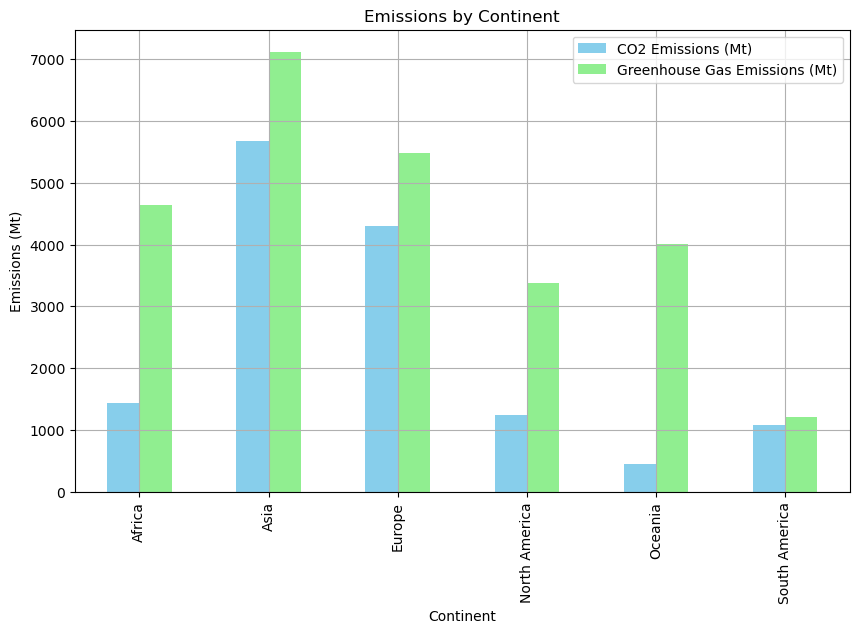

In [55]:
# plotting(Bar plot)
continent_summary.plot(kind='bar',color=['skyblue','lightgreen'], figsize=(10,6))
plt.title("Emissions by Continent")
plt.xlabel("Continent")
plt.ylabel("Emissions (Mt)")
plt.grid(True)
plt.show()


## Advanced Aggregation & grouping

In [62]:
# Group by 'Continent' and calculate sum, mean, and other statistics for emissions
continent_summary = df.groupby('Continent').agg({
    'CO2 Emissions (Mt)': ['sum', 'mean', 'median'],
    'Greenhouse Gas Emissions (Mt)': ['sum', 'mean', 'median']
})

print(continent_summary)


              CO2 Emissions (Mt)                     \
                             sum        mean median   
Continent                                             
Africa                   1438.76   26.643704   4.83   
Asia                     5670.77  138.311463  53.44   
Europe                   4300.75   97.744318  37.82   
North America            1242.73   36.550882   0.90   
Oceania                   440.87   33.913077   0.96   
South America            1084.65   83.434615  46.11   

              Greenhouse Gas Emissions (Mt)                      
                                        sum        mean  median  
Continent                                                        
Africa                               4635.5   92.710000   33.20  
Asia                                 7121.2  187.400000   85.05  
Europe                               5485.5  127.569767   54.50  
North America                        3380.7  160.985714   22.40  
Oceania                              4002.

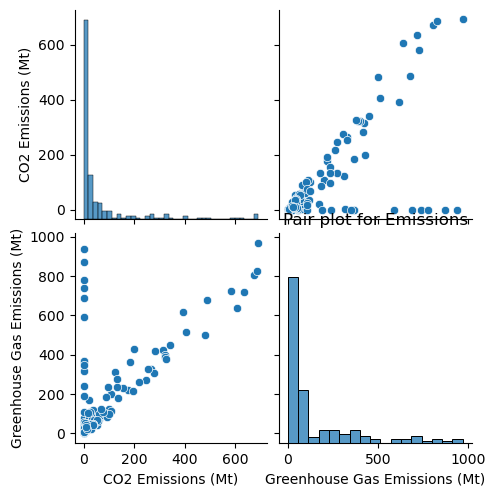

In [69]:
# advanced visualization(pair plot,Heat map)
# pair plot
sns.pairplot(df[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']])
plt.title("Pair plot for Emissions")
plt.show()

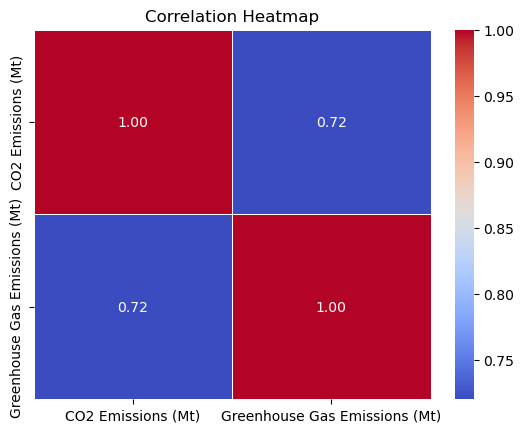

In [71]:
# Heat map & correlation matrix
corr_matrix=df[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Handling outliers

In [82]:
# IQR method(Better for skewed data)
Q1=df[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].quantile(0.25)
Q3=df[['CO2 Emissions (Mt)','Greenhouse Gas Emissions (Mt)']].quantile(0.75)
IQR=Q3-Q1
print(IQR)
#Filter out outliers
df_no_outliers = df[~((df[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']] < (Q1 - 1.5 * IQR)) | (df[['CO2 Emissions (Mt)', 'Greenhouse Gas Emissions (Mt)']] > (Q3 + 1.5 * IQR))).any(axis=1)] # ~(...): The tilde ~ means "not" → So we’re keeping only the non-outliers.
print(df_no_outliers) #.any(axis=1): If any value in a row is an outlier, it removes the whole row.# df_no_outliers: A new DataFrame without outliers based on the IQR method.

CO2 Emissions (Mt)                54.94
Greenhouse Gas Emissions (Mt)    166.10
dtype: float64
                  Region  CO2 Emissions (Mt)  Greenhouse Gas Emissions (Mt)  \
0            Afghanistan                5.68                           98.9   
1                Albania                4.49                           10.1   
3                 Angola               20.19                           79.7   
4               Anguilla                0.02                            NaN   
5    Antigua and Barbuda                0.28                            1.2   
..                   ...                 ...                            ...   
198            Venezuela               96.92                          233.9   
200       Western Sahara                0.24                            NaN   
201                Yemen               12.26                           21.8   
202               Zambia                9.27                           40.7   
203             Zimbabwe            

## Statistical Analysis


In [103]:
#Hypothesis Testing (T-test to compare CO2 emissions across two continents):

# Now select real values instead of 'Continent_A' and 'Continent_B'
continent_A = df[df['Continent'] == 'Asia']['Greenhouse Gas Emissions (Mt)'].dropna()
continent_B = df[df['Continent'] == 'Europe']['Greenhouse Gas Emissions (Mt)'].dropna()

# T-test
from scipy import stats
t_stat, p_val = stats.ttest_ind(continent_A, continent_B)
print("T-test result: t-stat =", t_stat, ", p-value =", p_val)


T-test result: t-stat = 1.2830982908300426 , p-value = 0.20320909502593867


## Data Insights and Advanced Reports

In [118]:
# Most Emitting Region by Continent:
top_emitters = df.groupby(['Continent', 'Region'])['CO2 Emissions (Mt)'].sum().reset_index()
top_emitters = top_emitters.sort_values(by='CO2 Emissions (Mt)', ascending=False)
print(top_emitters)


         Continent         Region  CO2 Emissions (Mt)
63            Asia      Indonesia              692.24
64            Asia           Iran              686.42
114         Europe        Germany              673.60
86            Asia    South Korea              635.50
84            Asia   Saudi Arabia              607.91
..             ...            ...                 ...
133         Europe         Russia                0.00
62            Asia          India                0.00
67            Asia          Japan                0.00
177  North America  United States                0.00
60            Asia          China                0.00

[204 rows x 3 columns]


In [116]:
# Top 10 Regions with Highest CO2 Emissions
top_10_regions=df[['Region','CO2 Emissions (Mt)']].sort_values(by='CO2 Emissions (Mt)',ascending=False).head(10)
print(top_10_regions)

           Region  CO2 Emissions (Mt)
87      Indonesia              692.24
88           Iran              686.42
70        Germany              673.60
170   South Korea              635.50
159  Saudi Arabia              607.91
33         Canada              582.07
120        Mexico              487.77
187        Turkey              481.25
25         Brazil              466.77
169  South Africa              404.97
